# 1. Importing libraries and data


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = r'/Users/Hempe/Google Drive/CareerFoundry/6_Advanced Analytics & Dashboard Design/FIFA 21 Data Analysis/'

In [4]:
# Import FIFA 21 Data Set players_21_cleaned_new.csv
df_players_cleaned = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'players_21_cleaned_new.csv'), index_col = False)

# 2. Data prep for regression analysis

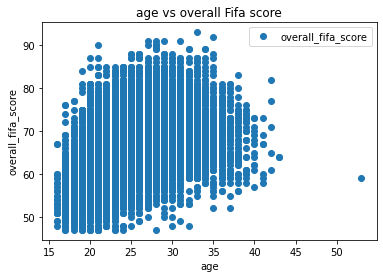

In [6]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_players_cleaned.plot(x = 'age', y='overall_fifa_score',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('age vs overall Fifa score')  
plt.xlabel('age')  
plt.ylabel('overall_fifa_score')  
plt.show()

State your hypothesis in a markdown cell within your Jupyter notebook:
"Players with an age between 28 and 32 have in average a higher overall score/ranking."

In [7]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_players_cleaned['age'].values.reshape(-1,1)
y = df_players_cleaned['overall_fifa_score'].values.reshape(-1,1)

In [8]:
X

array([[33],
       [35],
       [27],
       ...,
       [20],
       [23],
       [28]])

In [10]:
y

array([[93],
       [92],
       [91],
       ...,
       [47],
       [47],
       [47]])

In [11]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 03. Regression analysis

In [12]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [13]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [14]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

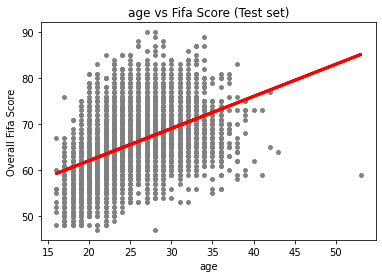

In [15]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('age vs Fifa Score (Test set)')
plot_test.xlabel('age')
plot_test.ylabel('Overall Fifa Score')
plot_test.show()

You can see that the linear model represented by the red regression line doesn’t perfectly cover all data points.You can see a tendency that players who are more experienced/older have a higher score, especially players between 25-30.

In [16]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score.

In [17]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.69941198]]
Mean squared error:  36.85064354892422
R2 score:  0.22421542084822232


In [18]:
y_predicted

array([[62.05940648],
       [62.05940648],
       [69.05352625],
       ...,
       [68.35411427],
       [64.15764241],
       [72.55058614]])

In [19]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,59,62.059406
1,75,62.059406
2,72,69.053526
3,65,63.458230
4,69,69.053526
5,66,62.758818
6,59,66.255878
7,60,62.059406
8,64,66.255878
9,67,62.059406


##### Compare how the regression fits the training set

In [20]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [21]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [22]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.69941198]]
Mean squared error:  38.89709346801776
R2 score:  0.2169682881493198


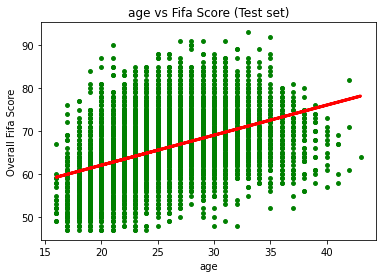

In [23]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('age vs Fifa Score (Test set)')
plot_test.xlabel('age')
plot_test.ylabel('Overall Fifa Score')
plot_test.show()

The model fits the training set on nearly the same level as the test set (confirmed by an R2 score of 0.22). This means I haven’t overfit my model! However, it also confirms that the relationship isn’t purely linear.